<a href="https://colab.research.google.com/github/lokesh331/lokesh12/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path="/content/drive/MyDrive/lokesh/income.csv"

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
df = pd.read_csv(file_path)
df.head()
import matplotlib.pyplot as plt

In [4]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [5]:
df.isnull()

,Name,Age,Income($)
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [7]:
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [8]:
df.shape

(22, 3)

Text(0, 0.5, 'Income')

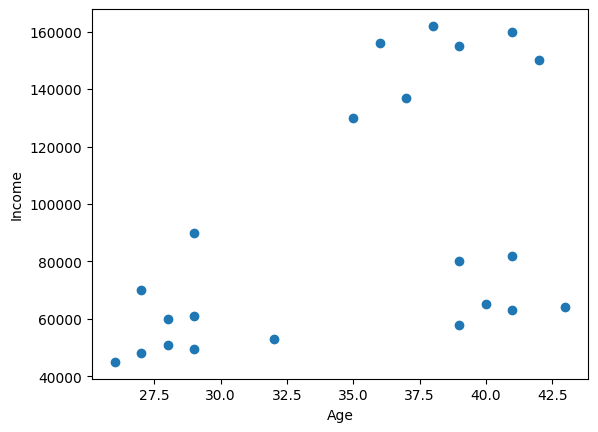

In [9]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

Text(0, 0.5, 'Age')

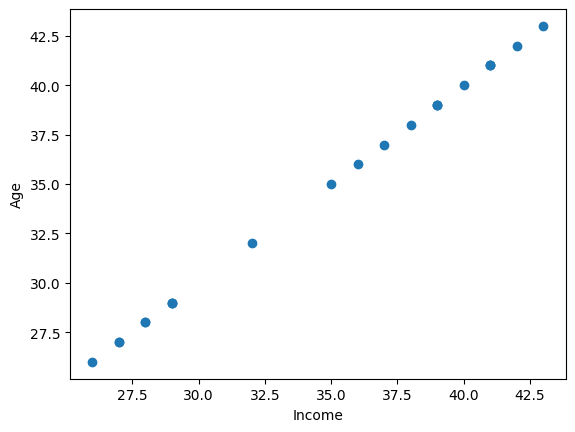

In [10]:
plt.scatter(df.Age,df['Age'])
plt.xlabel('Income')
plt.ylabel('Age')

In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [12]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [13]:
km.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

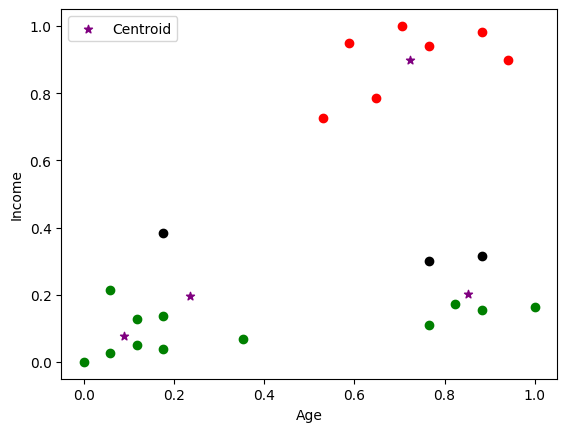

In [23]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age','Income($)']] = scaler.fit_transform(df[['Age','Income($)']])
print(df.head())
print(scaler.mean_)
print(scaler.scale_)

      Name       Age  Income($)  cluster
0      Rob -1.356055  -0.480684        0
1  Michael -1.009157  -0.010159        2
2    Mohan -1.009157  -0.692421        0
3   Ismail -1.182606  -0.715947        0
4     Kory  1.245679   1.401417        1
[3.48181818e+01 9.04318182e+04]
[5.76538545e+00 4.25056936e+04]


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age','Income($)']] = scaler.fit_transform(df[['Age','Income($)']])
print(df.head())
print(scaler.data_max_)
print(scaler.data_min_)

      Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        0
1  Michael  0.176471   0.384615        2
2    Mohan  0.176471   0.136752        0
3   Ismail  0.117647   0.128205        0
4     Kory  0.941176   0.897436        1
[1.4191277  1.68373166]
[-1.5295043  -1.06884077]


In [18]:
scaler = MinMaxScaler()
scaler.fit(df[['Age','Income($)']])
df[['Age','Income($)']] = scaler.transform(df[['Age','Income($)']])

In [19]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [20]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [21]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([3, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [22]:
km.cluster_centers_

array([[0.23529412, 0.1965812 ],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ],
       [0.08823529, 0.07621083]])